# Support Vector Machines

In [279]:
from sklearn.datasets import make_blobs, make_circles, fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

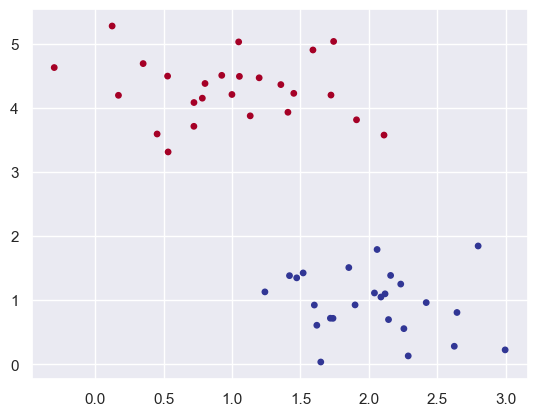

In [270]:
# Create some dummy data
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.5)
sns.set_theme()
plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='RdYlBu')

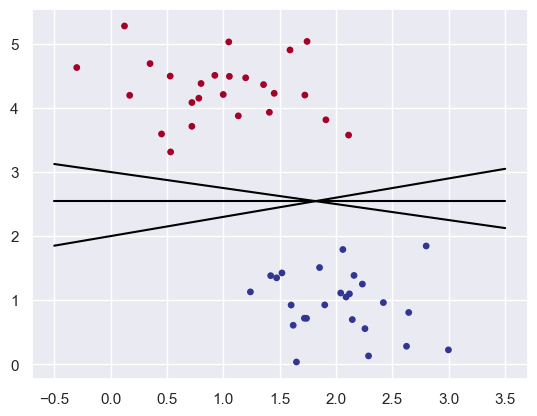

In [271]:
# Draw linear discriminators
plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='RdYlBu')
xfit = np.linspace(-0.5, 3.5)
for m, b in [(0.3, 2), (0, 2.55), (-0.25, 3)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit, color='black')

In [272]:
def plot_svc(X, clf, support_vectors=True):
    # Plot support vectors
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
        ax=ax
    )
    if support_vectors:
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=100,
            linewidth=1,
            facecolors="none",
            edgecolors="k",
        )
    C = clf.get_params()['C']
    gamma = clf.get_params()['gamma']
    plt.title(f"SVM (C = {C}, Gamma = {gamma})")
plt.show()

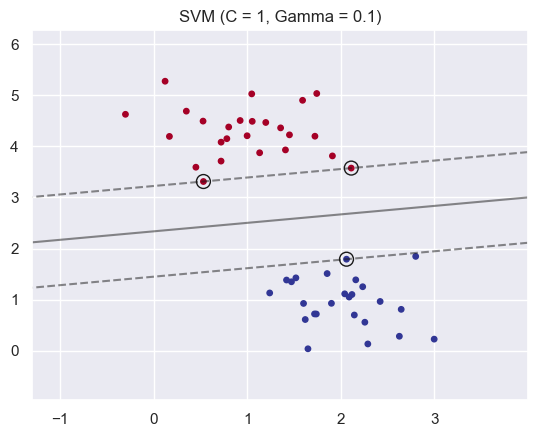

In [273]:
clf = SVC(kernel='linear', C=1, gamma=0.1)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='RdYlBu')
plot_svc(X, clf)

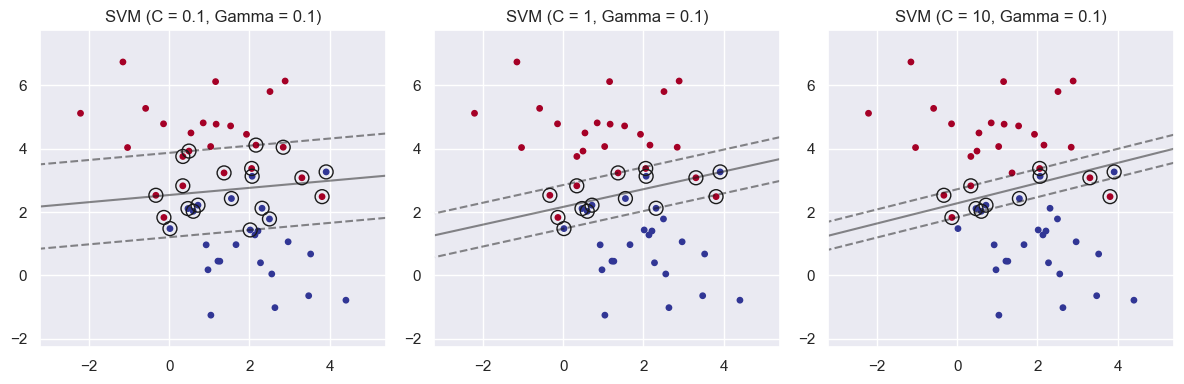

In [274]:
# Non-linearly separable data
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.25)

# Plot SVC classifiers with different C values
C_values = [0.1, 1, 10]
plt.figure(figsize=(12, 4))
for i, C in enumerate(C_values, 1):
    clf = SVC(C=C, kernel='linear', gamma=0.1)
    clf.fit(X, y)
    plt.subplot(1, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='RdYlBu')
    plot_svc(X, clf)
plt.tight_layout()
plt.show()

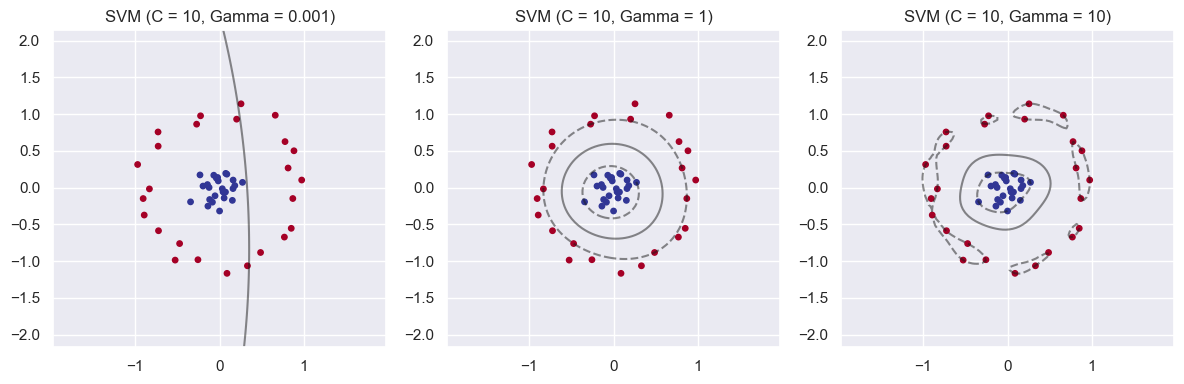

In [275]:
# Non-linearly separable data
X, y = make_circles(50, factor=.1, noise=.1, random_state=0)

# Plot SVC classifiers with different gamma values
gamma_values = [0.001, 1, 10]
plt.figure(figsize=(12, 4))
for i, gamma in enumerate(gamma_values, 1):
    clf = SVC(gamma=gamma, kernel='rbf', C=10)
    clf.fit(X, y)
    plt.subplot(1, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='RdYlBu')
    plot_svc(X, clf, support_vectors=False)
plt.tight_layout()
plt.show()

# Resources
- https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html